In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
with open('./execution_data.json') as result_json:
    data = json.load(result_json)
    
    result_dict = {}
    
    result_dict["task_id"] = []
    result_dict["lambda_time"] = []
    result_dict["download_time"] = []
    result_dict["upload_time"] = []
    result_dict["execution_time"] = []
    result_dict["ram"] = []
    result_dict["cost"] = []
    result_dict["ts"] = []
    
    for record in data['montage_0.35']:
        for record_key in record.keys():
            result_dict[record_key].append(record[record_key])

{1920, 2944, 1408, 2688, 1152, 896, 2432, 2176, 1664, 1536, 2112, 2368, 128, 2496, 2624, 640, 768, 1024, 1280, 1792, 2240, 1088, 1216, 2880, 3008, 1984, 2752, 960, 1856, 2304, 2048, 448, 2560, 2816, 832, 1344, 1472, 1600, 1728}


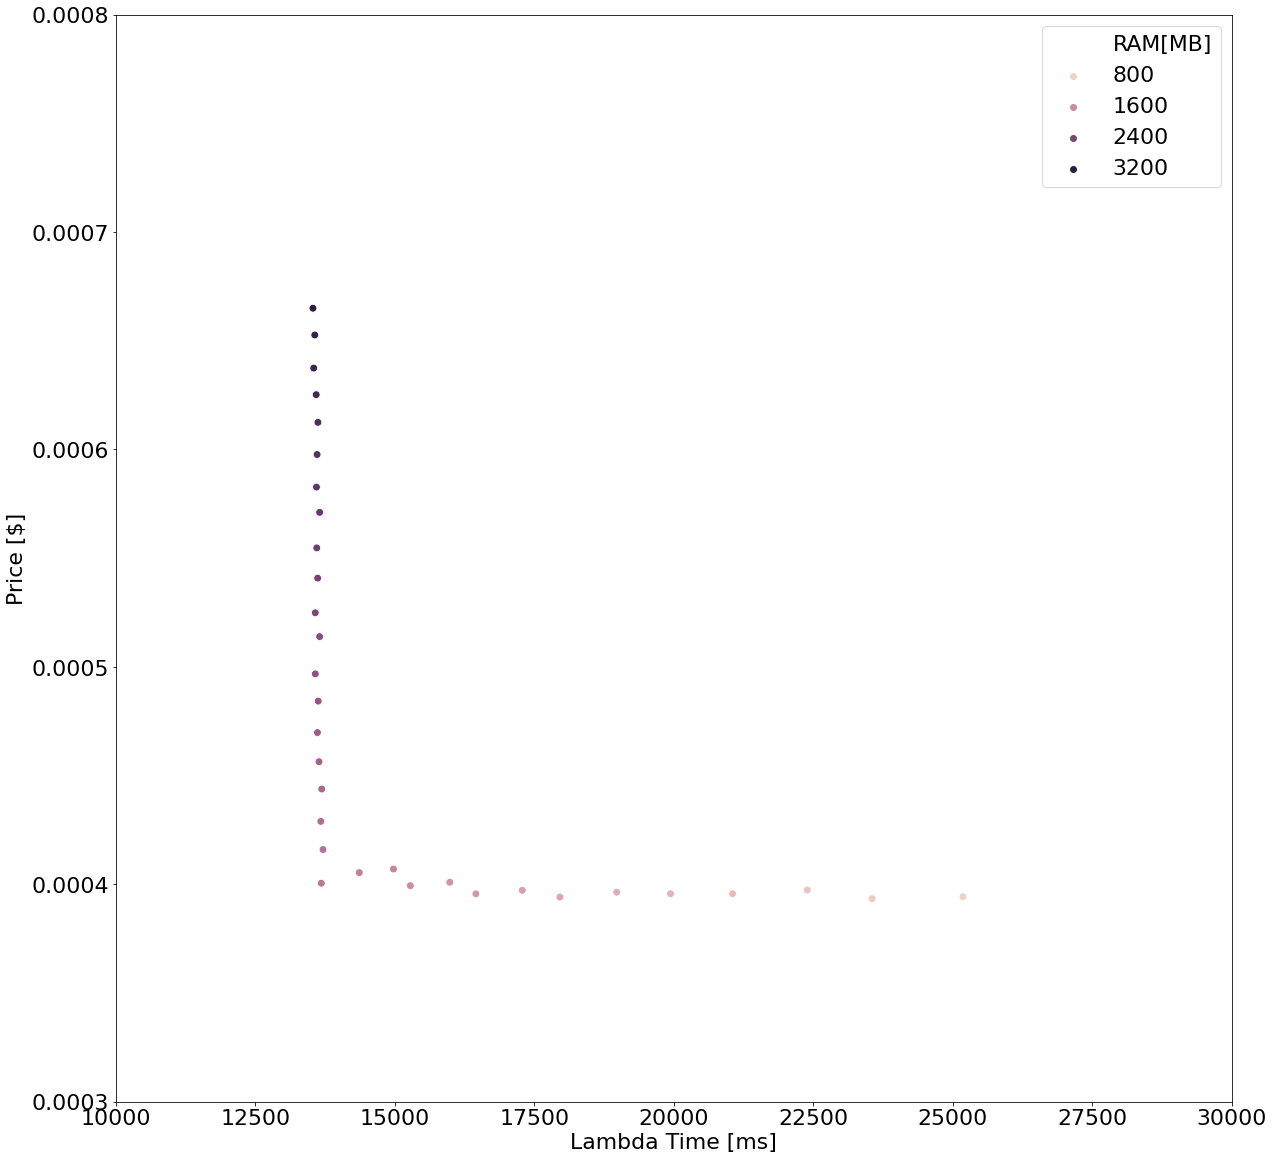

In [3]:
df = pd.read_csv("results.csv") 
df['task_core'] = df['task_name'].str.split('_', n = 0, expand = True)[0]
df = df[df['task_core'] == 'mProject']
print(set(df['ram'].values))
plt.figure(figsize=(20,20))
plt.ylim([0.0003, 0.0008])
plt.xlim([10000, 30000])
df['Lambda Time[ms]'] = df['lambda_time']
df['Price[$]'] = df['cost']
df['RAM[MB]'] = df['ram']
df = df.groupby('RAM[MB]').mean()
df = df[df['ram'] > 900]
df['RAM[MB]'] = df['ram']
sns.scatterplot(data=df, x='Lambda Time[ms]', y='Price[$]', hue='RAM[MB]', s=60)

plt.xlabel("Lambda Time [ms]", size=22)
plt.ylabel("Price [$]", size=22)
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.legend(fontsize=22)
plt.savefig('time-vs-price.pdf')

In [11]:

df = pd.DataFrame({"task_name" : list(result_dict["task_id"])})
df['lambda_time'] = pd.Series(list(result_dict["lambda_time"]), index=df.index)
df['download_time'] = pd.Series(list(result_dict["download_time"]), index=df.index)
df['upload_time'] = pd.Series(list(result_dict["upload_time"]), index=df.index)
df['execution_time'] = pd.Series(list(result_dict["execution_time"]), index=df.index)
df['ram'] = pd.Series(list(result_dict["ram"]), index=df.index)
df['cost'] = pd.Series(list(result_dict["cost"]), index=df.index)
df['ts'] = pd.Series(list(result_dict["ts"]), index=df.index)


NameError: name 'result_dict' is not defined

In [12]:
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.603481e+09,mDiffFit
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.603481e+09,mDiffFit
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.603481e+09,mDiffFit
3,mProject_30,13851,393,240,13216,1920,0.000434,1.603481e+09,mProject
4,mProject_30,21063,327,272,20463,1152,0.000396,1.603481e+09,mProject
...,...,...,...,...,...,...,...,...,...
48111,mDiffFit_365,379,221,43,114,3008,0.000020,1.604221e+09,mDiffFit
48112,mBackground_40,1568,216,223,1128,1024,0.000027,1.604221e+09,mBackground
48113,mBackground_65,1862,502,177,1183,1024,0.000032,1.604221e+09,mBackground
48114,mBackground_10,2050,597,213,1251,1024,0.000035,1.604221e+09,mBackground


In [8]:
df = df[df['cost'] != -1]
df.plot.scatter(x='re',
                c='DarkBlue',
                figsize=(20,15))

TypeError: scatter() missing 1 required positional argument: 'y'

In [13]:
df['task_core'] = df['task_name'].str.split('_', n = 0, expand = True)[0]
df = df[df['task_core'] == 'mProject']
print(set(df['ram'].values))
plt.figure(figsize=(20,20))
plt.ylim([0, 0.0008])
plt.xlim([0, 30000])
df['Lambda Time[ms]'] = df['lambda_time']
df['Price[$]'] = df['cost']
df['RAM[MB]'] = df['ram']
df = df.groupby('RAM[MB]').mean()
df['RAM[MB]'] = df['ram']
sns.scatterplot(data=df, x='Lambda Time[ms]', y='Price[$]', hue='RAM[MB]')

In [14]:
df

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core
0,mDiffFit_8,459,379,71,8,2944,0.000024,1.603481e+09,mDiffFit
1,mDiffFit_8,351,311,34,5,2944,0.000019,1.603481e+09,mDiffFit
2,mDiffFit_8,747,689,38,16,1152,0.000015,1.603481e+09,mDiffFit
3,mProject_30,13851,393,240,13216,1920,0.000434,1.603481e+09,mProject
4,mProject_30,21063,327,272,20463,1152,0.000396,1.603481e+09,mProject
...,...,...,...,...,...,...,...,...,...
48111,mDiffFit_365,379,221,43,114,3008,0.000020,1.604221e+09,mDiffFit
48112,mBackground_40,1568,216,223,1128,1024,0.000027,1.604221e+09,mBackground
48113,mBackground_65,1862,502,177,1183,1024,0.000032,1.604221e+09,mBackground
48114,mBackground_10,2050,597,213,1251,1024,0.000035,1.604221e+09,mBackground


{1920, 2944, 1408, 2688, 1152, 896, 2432, 2176, 1664, 1536, 2112, 2368, 128, 2496, 2624, 640, 768, 1024, 1280, 1792, 2240, 1088, 1216, 2880, 3008, 1984, 2752, 960, 1856, 2304, 2048, 448, 2560, 2816, 832, 1344, 1472, 1600, 1728}


<ipython-input-15-4968f4ea578e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lambda Time[ms]'] = df['lambda_time']
<ipython-input-15-4968f4ea578e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price[$]'] = df['cost']
<ipython-input-15-4968f4ea578e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,Lambda Time[ms],Price[$]
RAM[MB],,,,,,,,,
128,17266.000000,183.000000,179.000000,16904.000000,128.0,0.000036,1.604209e+09,17266.000000,0.000036
448,15905.750000,243.000000,195.750000,15466.000000,448.0,0.000116,1.604189e+09,15905.750000,0.000116
640,21303.000000,142.000000,188.000000,20973.000000,640.0,0.000223,1.604177e+09,21303.000000,0.000223
768,13473.333333,101.333333,179.666667,13192.000000,768.0,0.000169,1.604205e+09,13473.333333,0.000169
832,27379.181818,247.272727,227.909091,26903.818182,832.0,0.000371,1.604193e+09,27379.181818,0.000371
896,26986.602679,223.705357,214.464286,26548.008929,896.0,0.000394,1.604084e+09,26986.602679,0.000394
960,25184.798165,205.981651,214.944954,24763.752294,960.0,0.000394,1.604190e+09,25184.798165,0.000394
1024,23555.220657,180.399061,219.802817,23155.464789,1024.0,0.000393,1.604193e+09,23555.220657,0.000393
1088,22392.490196,225.392157,217.235294,21949.490196,1088.0,0.000397,1.604184e+09,22392.490196,0.000397


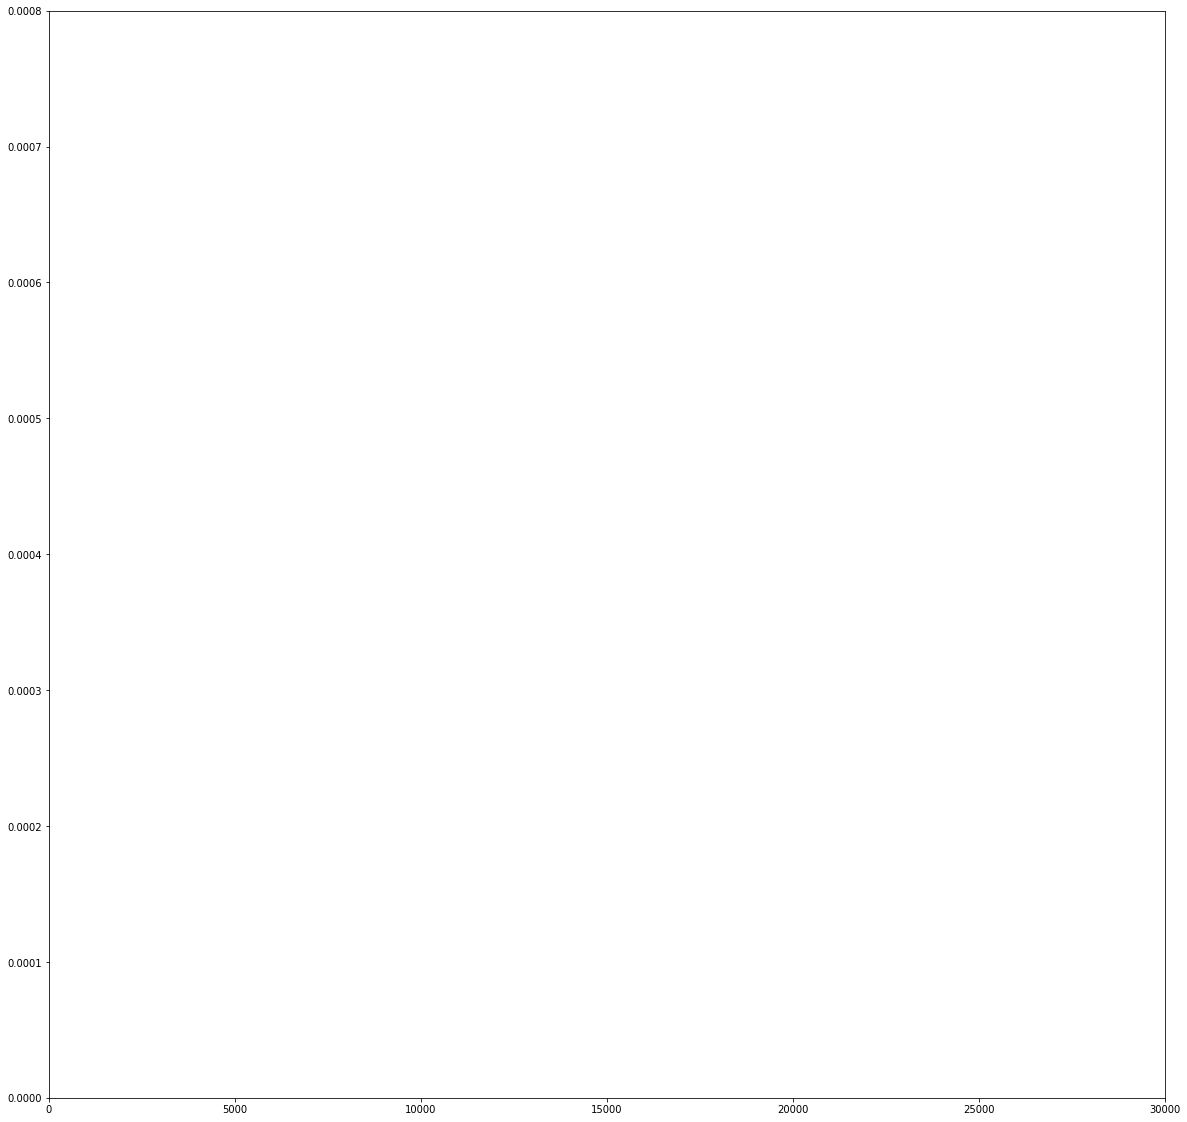

In [15]:
df = df[df['task_core'] == 'mProject']
print(set(df['ram'].values))
plt.figure(figsize=(20,20))
plt.ylim([0, 0.0008])
plt.xlim([0, 30000])
df['Lambda Time[ms]'] = df['lambda_time']
df['Price[$]'] = df['cost']
df['RAM[MB]'] = df['ram']
df = df.groupby('RAM[MB]').mean()
df['RAM[MB]'] = df['ram']
sns.scatterplot(data=df, x='Lambda Time[ms]', y='Price[$]', hue='RAM[MB]')

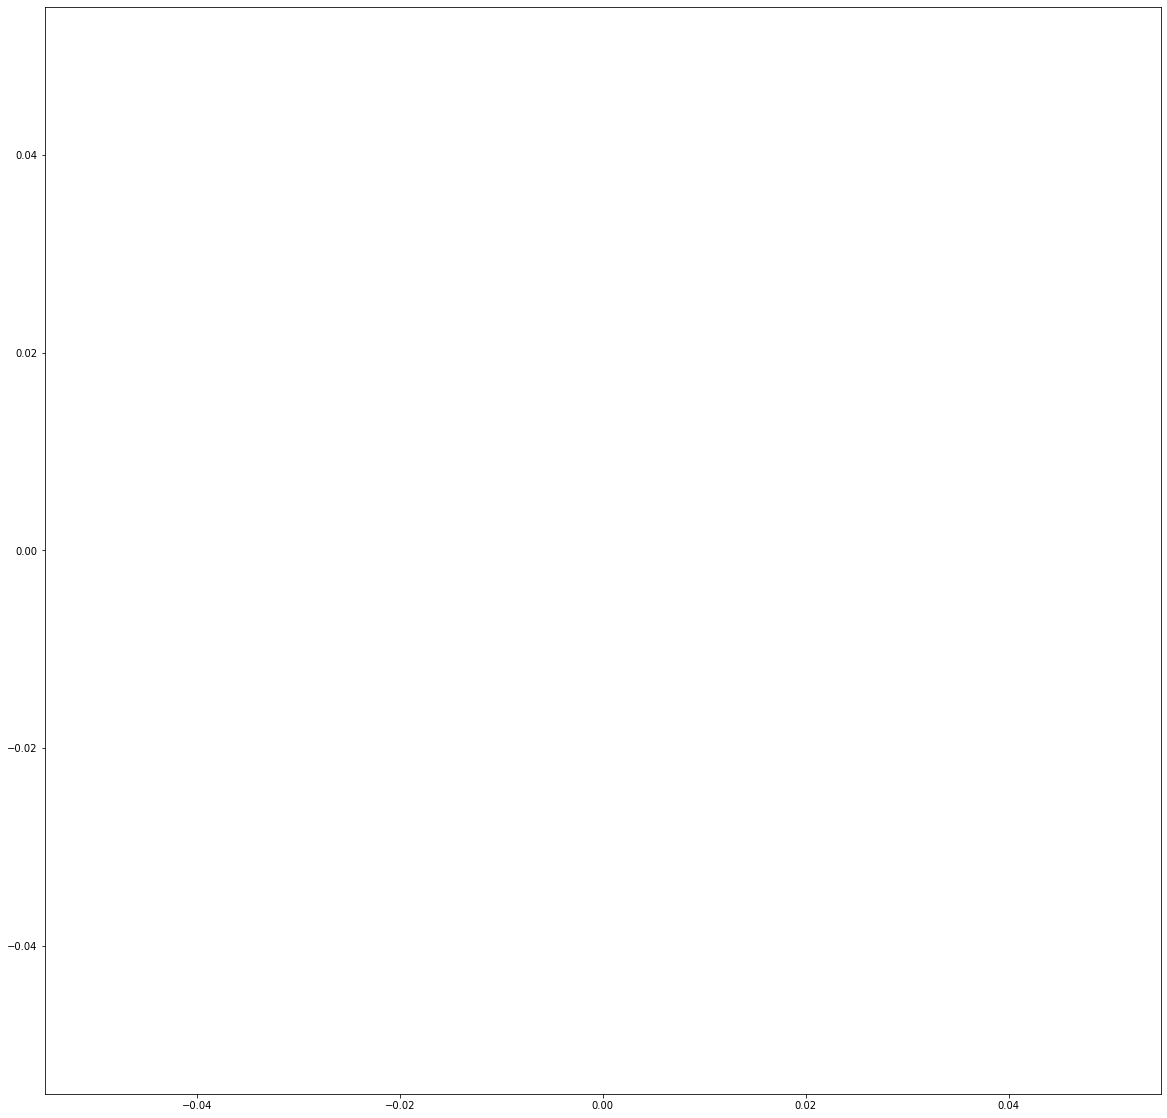

In [6]:
new_df = df[df['task_core'] == 'mAdd']
# new_df = new_df[new_df['ram'] == ]
new_df = df[df['cost'] < 0.00010]
new_df = df[df['lambda_time'] < 4_000]
plt.figure(figsize=(20,20))
sns.scatterplot(data=new_df, x='lambda_time', y='cost', hue='ram')

In [20]:
df.to_csv('./results.csv', index = False, header = True)

In [4]:
df['reward'] = (df['lambda_time'] +  35_000_000 * df['cost']) / 40_000
#df['new_cost'] = 35_000_000 * df['cost']

In [5]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=df, x='reward', hue='task_core')

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

<Figure size 1440x1440 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb509f84790>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

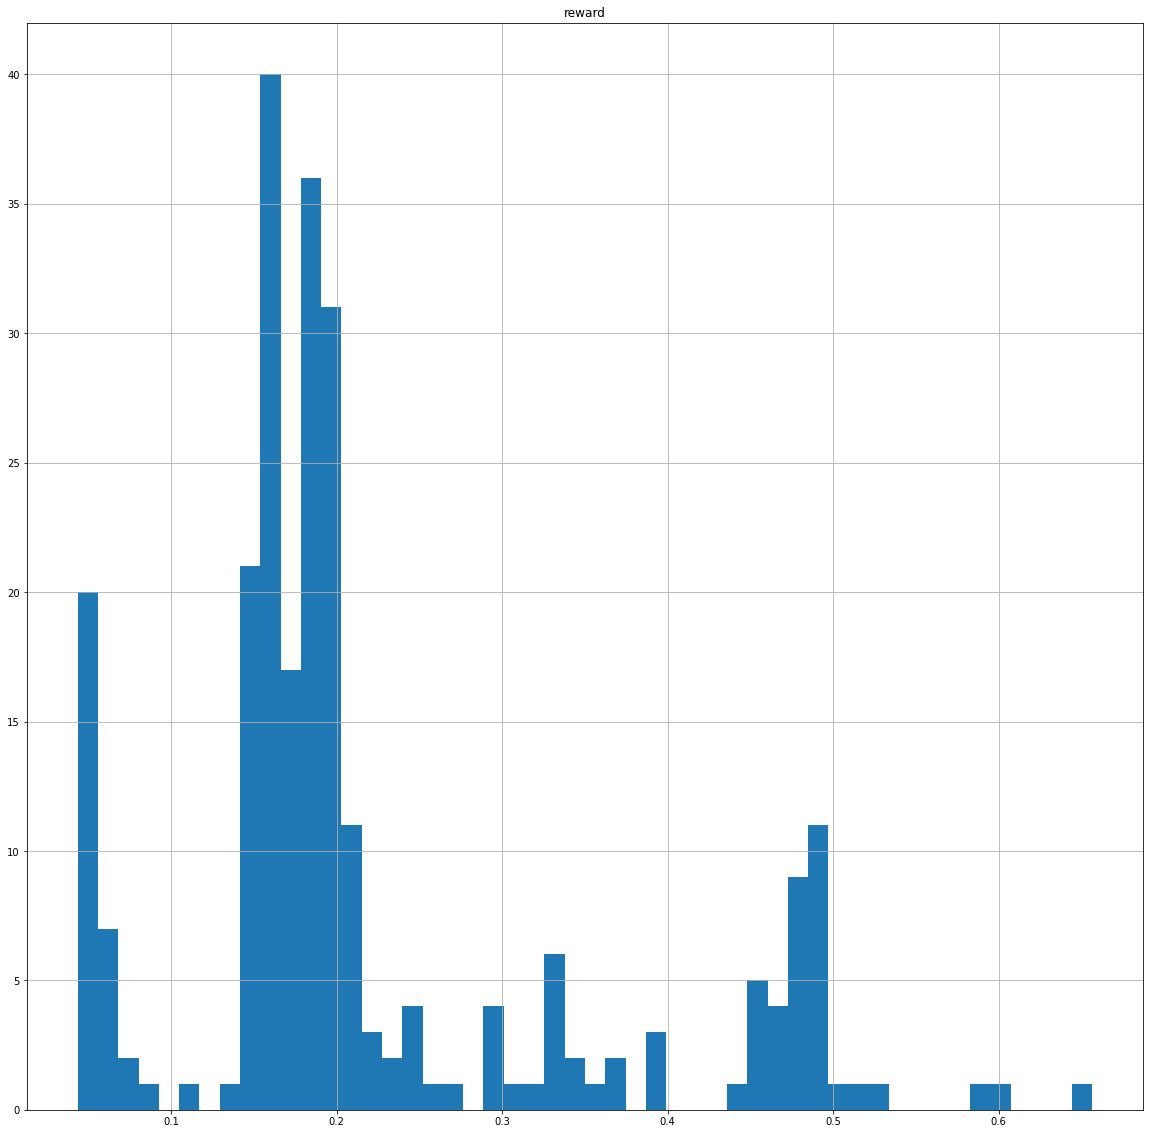

In [28]:
new_df = df[df['task_core'] =='mBgModel']
plt.figure( figsize=(20,20))
new_df.hist(column = 'reward',bins=50, figsize=(20,20))

In [48]:
df['new_upload_time'] = df['upload_time'] / 100
df.astype({'new_upload_time': 'int32'})

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,task_core,reward,new_cost,new_upload_time
0,mDiffFit_8,459,379,71,8,2944,0.000024,1603481324.07255,mDiffFit,0.032439,838.543344,0
1,mDiffFit_8,351,311,34,5,2944,0.000019,1603481448.9180465,mDiffFit,0.025546,670.834675,0
2,mDiffFit_8,747,689,38,16,1152,0.000015,1603481452.4749908,mDiffFit,0.031800,525.001050,0
3,mProject_30,13851,393,240,13216,1920,0.000434,1603481469.2875435,mProject,0.726354,15203.155406,2
4,mProject_30,21063,327,272,20463,1152,0.000396,1603481490.998285,mProject,0.872748,13846.902694,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6313,mDiffFit_230,2699,2471,128,120,128,0.000006,1603528338.6676273,mDiffFit,0.072397,196.875394,1
6314,mDiffFit_4,2987,2620,259,100,128,0.000006,1603528397.036302,mDiffFit,0.080144,218.750438,2
6315,mBackground_80,1456,300,223,933,1408,0.000034,1603528399.1880345,mBackground,0.066478,1203.127406,2
6316,mDiffFit_287,5487,5019,219,239,128,0.000011,1603528471.686384,mDiffFit,0.147201,401.042469,2


In [26]:
df.groupby('task_core').count()

,task_name,lambda_time,download_time,upload_time,execution_time,ram,cost,ts,reward
task_core,,,,,,,,,
mAdd,244,244,244,244,244,244,244,244,244
mBackground,7081,7081,7081,7081,7081,7081,7081,7081,7081
mBgModel,255,255,255,255,255,255,255,255,255
mConcatFit,255,255,255,255,255,255,255,255,255
mDiffFit,33941,33941,33941,33941,33941,33941,33941,33941,33941
mImgtbl,211,211,211,211,211,211,211,211,211
mProject,5816,5816,5816,5816,5816,5816,5816,5816,5816
mViewer,313,313,313,313,313,313,313,313,313
